# DHLAB

This notebook showcases the DHLAB infrastructure of the National Library of Norway. The infrastructure is both a REST API, a Python package (pip install dhlab) and a number of easy-to-use web apps located at dh.nb.no/apps.

In [ ]:
# Uncomment this line if you get ImportErrors below
# !pip install dhlab

## Exercises

- Run the code below and reflect: What does each code cell do?
- What does the corpus analysis tell us about the usage of the word 'ytringsfrihet'?
- Think about a different word to investigate in the book collection of the National Library. 
- Carry out a similar corpus analysis on that word. Are your expectations met?
- Do you see any limitations in this kind of corpus analysis?

## NB N-gram

NB N-gram (nb.no/ngram) is a trend viewer with word (n-gram) frequencies, allowing you to investigate the usage of words and sequences of words over time. For each word, we calculate a relative frequency (shown on the y-axis), i.e. the term frequency divided by the amount of words in all books in a particular year.

NB N-gram is a good place to start when looking for a phenomenon to investigate. We can use NB N-gram through the __dhlab__ package. Belove, we illustrate the usage of NB N-gram with the example word 'ytringsfrihet':

In [48]:
from dhlab import Ngram

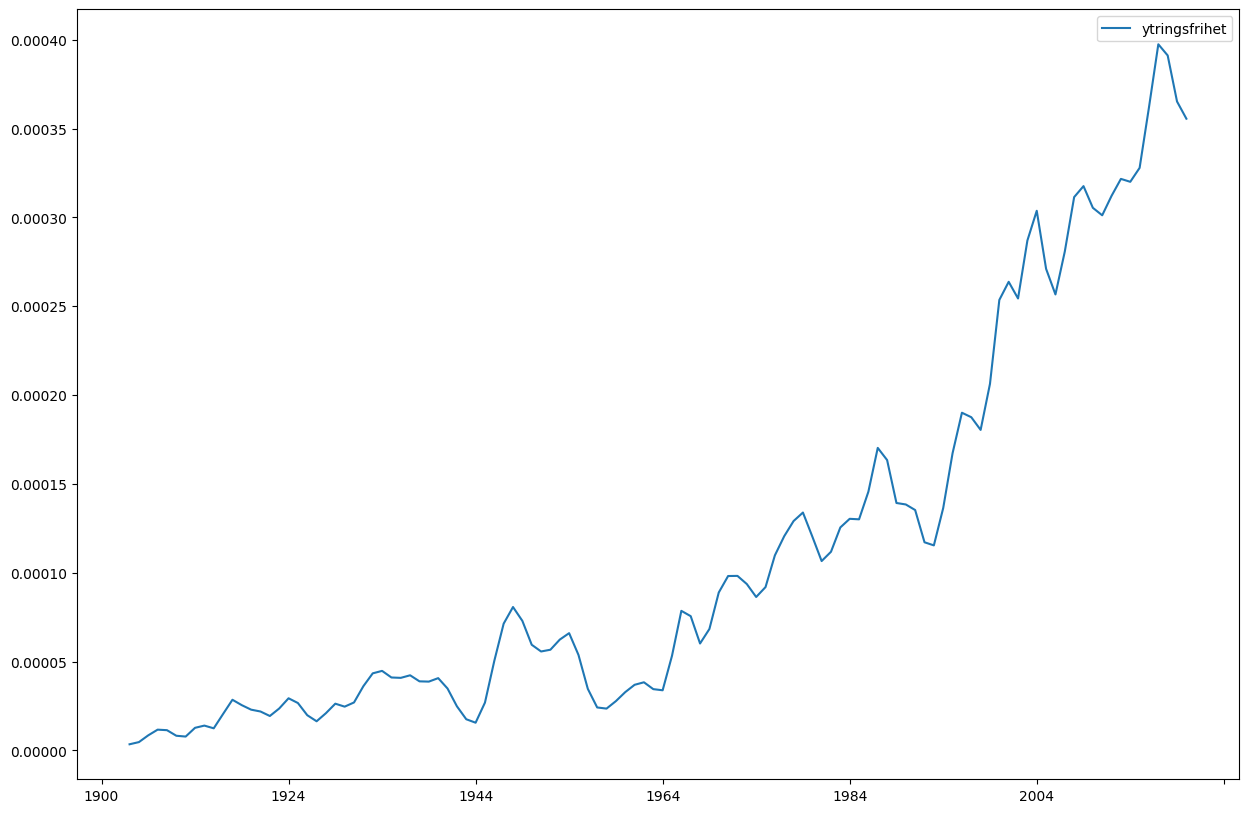

In [51]:
Ngram(words=["ytringsfrihet"], from_year=1900, to_year=2020, doctype="bok")

## Corpus

We 

We will start by creating a corpus, containing all the texts we want to investigate. We will concentrate on books here (doctype="digibok") in the period between 1990 and 2020, where the word "ytringsfrihet" is used at least one once. We will limit the search to max. 1000 instances.

In [ ]:
from dhlab import Corpus

In [10]:
corpus = Corpus(doctype="digibok", from_year=1990, to_year=2020, fulltext="ytringsfrihet", limit=1000)

Let us now have a quick look at some sample content (the first 10 entries) of the corpus:

In [11]:
corpus[["urn", "title", "authors", "year"]].head(10)

,urn,title,authors,year
10800,URN:NBN:no-nb_digibok_2021093048519,"Særtrykk av Det norske samfunn : (bind 1, 2 og...","Frønes, Ivar / Kjølsrød, Lise",2017
488,URN:NBN:no-nb_digibok_2012103106114,Kosmopolitikk : en optimistisk politikk for de...,"Eriksen , Thomas Hylland / Tretvoll , Halvor F...",2006
1769,URN:NBN:no-nb_digibok_2014030306052,I lidenskapens vold,"Du Pont , Diane / Gabrielsen , Marianne",2009
11634,URN:NBN:no-nb_digibok_2018021348091,Portretter 1814 - 2014,"Ugelstad , Janike Sverdrup",2014
4176,URN:NBN:no-nb_digibok_2014061205103,Adrian Marconis store sorg,"Olsen , Morten Harry",2011
11397,URN:NBN:no-nb_digibok_2018062148100,Vikinger : skuespill i 5 akter,"Borgen , Johan",2000
11765,URN:NBN:no-nb_digibok_2018073048052,"Religion, etikk og filosofi i barnehagen","Andreassen , Bengt-Ove / Olsen , Torjer A.",2014
4334,URN:NBN:no-nb_digibok_2014081406008,Skuddene på Serena hotell,"Græsvik , Fredrik",2009
9364,URN:NBN:no-nb_digibok_2020080407072,Gi meg himmelen : den forbløffende sannheten o...,"Xinran / Poulsson , Poul Henrik",2016
1070,URN:NBN:no-nb_digibok_2013082206033,Monitor : [samfunnsfag for 8.-10.trinn] : Oppg...,"Berner , Elisabeth S.",2008


## Concordance

The DHLAB package allows us to extract __concordances__ and __collocations__ from the desired corpus. Let's start by looking at occurences of the word 'ytringsfrihet' in the selected corpus:

In [25]:
corpus.conc(words='"ytringsfrihet"').show()

,link,concordance
468,URN:NBN:no-nb_digibok_2014071006024,... en analyse av de forhold som påvirker den reelle ytringsfrihet og en drøftelse av det rettspolitiske grunnlag for grunnlovsvernet av...
232,URN:NBN:no-nb_digibok_2020032648091,"... Volden utgjør en av de største trusler mot pressefrihet og ytringsfrihet , konstaterer UNESCO ."
368,URN:NBN:no-nb_digibok_2021012907595,Forhåndskontroll av film og aldersgrenser for barns adgang til kinosalen har satt grenser for unges ytringsfrihet i hundre år ....
281,URN:NBN:no-nb_digibok_2021011207701,... på mange av de kritiske argumentene mot åpenhet og ytringsfrihet . Forfatterne forklarer dette med tillitsgraden som vises til de...
65,URN:NBN:no-nb_digibok_2012110106089,"... I det totalitære regimet er det ingen forskjell på politikk og privatliv , og det finnes ingen ytringsfrihet ."
89,URN:NBN:no-nb_digibok_2021072248721,... Paragraf 100 i Grunnloven slår fast prinsippet om ytringsfrihet og trykkefrihet .
327,URN:NBN:no-nb_digibok_2012111508250,... tradisjon i å ta opp spørsmål omkring demokrati og ytringsfrihet ? Eller kunne han la dem kveles av en global...
235,URN:NBN:no-nb_digibok_2015051308234,En slik utstrakt ytringsfrihet finnes i flere konstitusjoner i den demokratiske del av verden og har til hensikt å gi...
153,URN:NBN:no-nb_digibok_2021101248563,"Uten ytringsfrihet og uten et variert tilbud av massemedier , der ytringsfriheten kan komme til uttrykk , er demokratiet utenkelig..."
176,URN:NBN:no-nb_digibok_2020042748543,"... I tillegg poengterer noen teoretikere at demokrati forutsetter ytringsfrihet for alle , og dessuten en fungerende presse og opplyst befolkning..."


The table shows example concordances from our corpus. The first column contains the object identifier (the URN) with a link to Nettbiblioteket. If you click on the link, you can open that particular book in Nettbiblioteket. Click on the search icon to look for the word inside the digitized book. The last column contains the concordance itself. The bold word is the match and the surrounding words are the context. This kind of concordance is therefore often called Key-word in context (KWIC concordance).

## Collocation

Concordances are typically analyzed qualitatively, by reading and judging each example. We can also take a quntitative approach and count co-occuring words. The idea is that co-occuring words say something about the usage of a word. In corpus linguistics, there is a saying that "You shall know a word by the company it keeps." (John Rupert Firth). We start by simply counting words surrounding 'ytringsfrhet', sorting that list from top to buttom and extracting the top 10 words:

In [30]:
corpus.coll(words="ytringsfrihet").show().head(10)

,counts
",",2990
.,2689
og,2604
i,1287
til,1043
for,988
som,961
er,890
om,815
av,775


When looking at the words surrounding 'ytringsfrihet', counting these and sorting the list, we typically find words of grammar and tokens of punctuation that would appear before and after almost any noun. We are looking for the words that occur more often together with 'ytringsfrihet' than one would expect. For that purpose, we download a list of the 200,000 most frequent words in the book collections of the National Library of Norway.

In [31]:
from dhlab import totals
frequency_list = totals(200000)

We then use that frequency list as a reference for the collocation analysis, yielding a new column, "relevance". A number higher than one tells us that the word is over-represented (occurs more often than one would expect looking at all books as a whole):

In [43]:
corpus.coll(words="ytringsfrihet", reference=frequency_list).sort(by="relevance").head(10)

,counts,relevance
organisasjonsfrihet,62,6738.604227
trosfrihet,44,4454.184066
trykkefrihet,36,3512.794452
religionsfrihet,109,3241.999139
personvern,98,2347.347987
menings-,34,2318.778840
pressefrihet,37,2284.816540
Ytringsfrihet,25,2090.649636
rettssikkerhet,83,1325.928108
tanke-,28,1253.164936
